# 📈 **Логистическая регрессия**

**В машинном обучении и в этом ноутбуке мы часто используем библиотеку Scikit-learn.**

<a href="https://scikit-learn.org" target="_blank"><img src="https://s4.uupload.ir/files/download_(1)_slz6.png" border="0"  /></a>

### **Для чего используется Scikit-learn?**

Scikit-learn (Sklearn) — это самая полезная и мощная библиотека для машинного обучения в Python. Она предоставляет набор эффективных инструментов для машинного обучения и статистического моделирования, включая классификацию, регрессию, кластеризацию и уменьшение размерности, через единый и удобный интерфейс в Python.

## **Для чего используется логистическая регрессия?**

Логистическая регрессия используется для предсказания вероятностей, которые выражаются в диапазоне от 0 до 1. Для этого применяется логистическая функция, которая преобразует линейную комбинацию входных данных в вероятность принадлежности объекту к положительному классу.


## **Предсказания с использованием логистической регрессии**

Рассмотрим пример. Предположим, мы хотим предсказать вероятность того, что человек страдает от определенного заболевания (y = 1), на основе его возраста (x). Модель логистической регрессии для этой задачи может быть представлена следующим образом:

**P(y=1|x) = 1 / (1 + e^-(B0 + B1 * x))**

```
где:

P(y=1|x) — вероятность того, что человек болен (класс 1),
B0 — коэффициент смещения (bias),
B1 — коэффициент для возраста,
x — входной признак (возраст),
e — основание натурального логарифма (около 2.718).
```

После того как коэффициенты B0 и B1 будут обучены с помощью метода максимального правдоподобия, можно использовать модель для предсказания вероятности того, что человек страдает от заболевания на основе его возраста.

Например, пусть B0 = -4 и B1 = 0.1. Рассчитаем вероятность того, что человек, возрастом 50 лет, болен:
$$
P(y=1 \mid x=50) = \frac{1}{1 + e^{-(-4 + 0.1 \cdot 50)}} = \frac{1}{1 + e^{-1}} \approx \frac{1}{1 + 0.368} \approx 0.731
$$
Это означает, что вероятность того, что человек с возрастом 50 лет болен, составляет примерно 73.1%.



Теперь, когда мы знаем, как делать предсказания с использованием обученной модели логистической регрессии, давайте рассмотрим некоторые практические рекомендации по подготовке данных, чтобы максимально эффективно использовать этот тип модели.

# 📤 Импорт и установка библиотек

In [ ]:
!pip install hvplot
!pip install colorama

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from colorama import Fore, Back, Style
from mlxtend.plotting import plot_confusion_matrix
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

%matplotlib inline

# ⚫ Контекст задачи

Сердечно-сосудистые заболевания (ССЗ) являются причиной смерти номер 1 в мире, ежегодно унося, по оценкам, 17,9 миллионов жизней, что составляет 31% всех смертей в мире. Четыре из 5 смертей от ССЗ происходят из-за сердечных приступов и инсультов, и одна треть этих смертей происходит преждевременно у людей в возрасте до 70 лет. Сердечная недостаточность является распространенным явлением, вызванным ССЗ, и этот набор данных содержит 11 признаков, которые можно использовать для прогнозирования возможного заболевания сердца.

Людям с сердечно-сосудистыми заболеваниями или тем, кто находится в группе высокого сердечно-сосудистого риска (из-за наличия одного или нескольких факторов риска, таких как гипертония, диабет, гиперлипидемия или уже развившееся заболевание), необходимо раннее выявление и лечение, в котором модель машинного обучения может оказать большую помощь

Ссылка на датасет: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data

![](http://www.mydr.com.au/wp-content/uploads/2019/04/heart_failure_750.jpeg)

# 💾 Проверка данных

In [ ]:
import kagglehub
dir_path = kagglehub.dataset_download('andrewmvd/heart-failure-clinical-data')
csv_file = os.path.join(dir_path, 'heart_failure_clinical_records_dataset.csv')
print('Data source import complete.')

Data source import complete.


In [ ]:
heart_data=pd.read_csv(csv_file)

In [ ]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Расшифровка**
```
index
Индекс строки (обычно это просто уникальный идентификатор записи, не имеет отношения к данным).

age
Возраст пациента (в годах).

anaemia
Наличие анемии у пациента:

    1 — анемия есть
    0 — анемии нет

creatinine_phosphokinase
Уровень фермента креатинфосфокиназы (CPK) в крови (в международных единицах на литр, mcg/L).

diabetes
Наличие диабета у пациента:

    1 — диабет есть
    0 — диабета нет

ejection_fraction
Фракция выброса — процентная доля крови, покидающей сердце при каждом сокращении (в процентах).

high_blood_pressure
Наличие гипертонии (повышенного кровяного давления):

    1 — гипертония есть
    0 — гипертонии нет

platelets
Уровень тромбоцитов в крови (в тысячах тромбоцитов на микролитр).

serum_creatinine
Уровень креатинина в сыворотке крови (в миллиграммах на децилитр, mg/dL).

serum_sodium
Уровень натрия в сыворотке крови (в миллимолях на литр, mmol/L).

sex
Пол пациента:

    1 — мужчина
    0 — женщина

smoking
Курение пациента:

    1 — курит
    0 — не курит

time
Время наблюдения в днях (в течение которого проводился мониторинг состояния пациента).

DEATH_EVENT
Целевая переменная (только в случае задачи классификации):

    1 — пациент умер
    0 — пациент выжил
```



In [ ]:
heart_data.shape

(299, 13)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: >

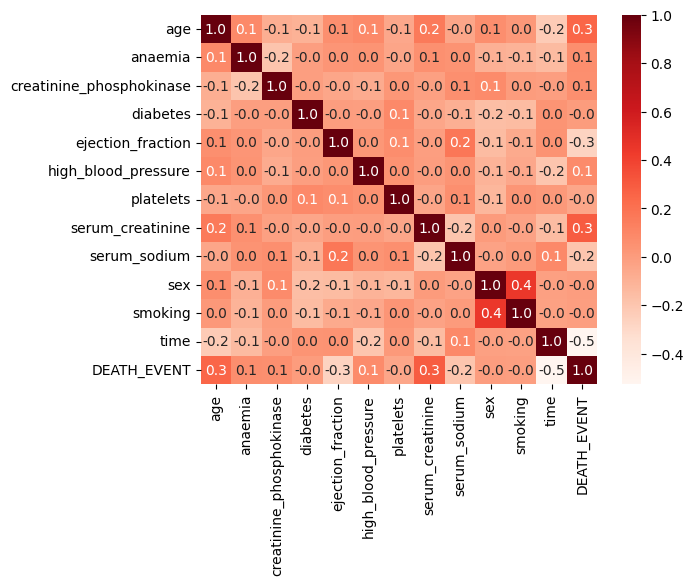

In [ ]:
sns.heatmap(heart_data.corr(), annot=True,cmap='Reds', fmt='.1f')

# 📊 Исследовательский анализ данных (EDA)

In [ ]:
# Возраст - распределение

hist_data =[heart_data["age"].values]
group_labels = ['age']

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [ ]:
fig = px.box(heart_data, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Распределение пол-возраст - Мужчины = 1 Женщины =0")
fig.show()

In [ ]:
import plotly.graph_objects as go

# Разделение на мужчин и женщин
male = heart_data[heart_data["sex"] == 1]
female = heart_data[heart_data["sex"] == 0]

# Фильтрация по статусу DEATH_EVENT
male_survi = male[male["DEATH_EVENT"] == 0]
male_not = male[male["DEATH_EVENT"] == 1]
female_survi = female[female["DEATH_EVENT"] == 0]
female_not = female[female["DEATH_EVENT"] == 1]

# Подготовка данных для круговой диаграммы
labels = ['Мужчина - Выжил', 'Мужчина - Не выжил', 'Женщина - Выжила', 'Женщина - Не выжила']
values = [
    len(male_survi),
    len(male_not),
    len(female_survi),
    len(female_not)
]

# Создание круговой диаграммы
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title_text="Анализ выживания - Пол")
fig.show()


In [ ]:
surv = heart_data[heart_data["DEATH_EVENT"]==0]["age"]
not_surv = heart_data[heart_data["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Анализ возраст  - выживание")
fig.show()

In [ ]:
fig = px.violin(heart_data, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Анализ (возраст + пол)  - выживание")
fig.show()

Выживаемость высока в возрастном диапазоне от 40 до 70 лет

Выживаемость высока как для мужчин в возрасте от 50 до 60 лет, так и для женщин в возрасте от 60 до 70 лет соответственно

In [ ]:
fig = px.violin(heart_data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Анализ (возраст + курение)  - выживание")
fig.show()


Выживаемость высокая для некурящего человека от 55 до 65 лет, в то время как для курящего человека она составляет от 50 до 60 лет

Смертность для курящего человека выше, чем для некурящего человека

# 📈 Обучение модели линейной регрессии

## X и y arrays

In [ ]:
Features = ['time','ejection_fraction','serum_creatinine']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]



## 🧱 Train Test Split

Теперь давайте разделим данные на обучающий и тестовый наборы. Мы обучим модель на обучающем наборе, а затем используем тестовый набор для оценки модели.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
x_train.shape

(239, 3)

In [ ]:
x_test.shape

(60, 3)

## ✔️ Логистическая регрессия

In [ ]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list = []
accuracy_list.append(100*log_reg_acc)


In [ ]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))



Accuracy of Logistic Regression is :  90.00%


## ✔️ Оценка модели

<Figure size 640x480 with 0 Axes>

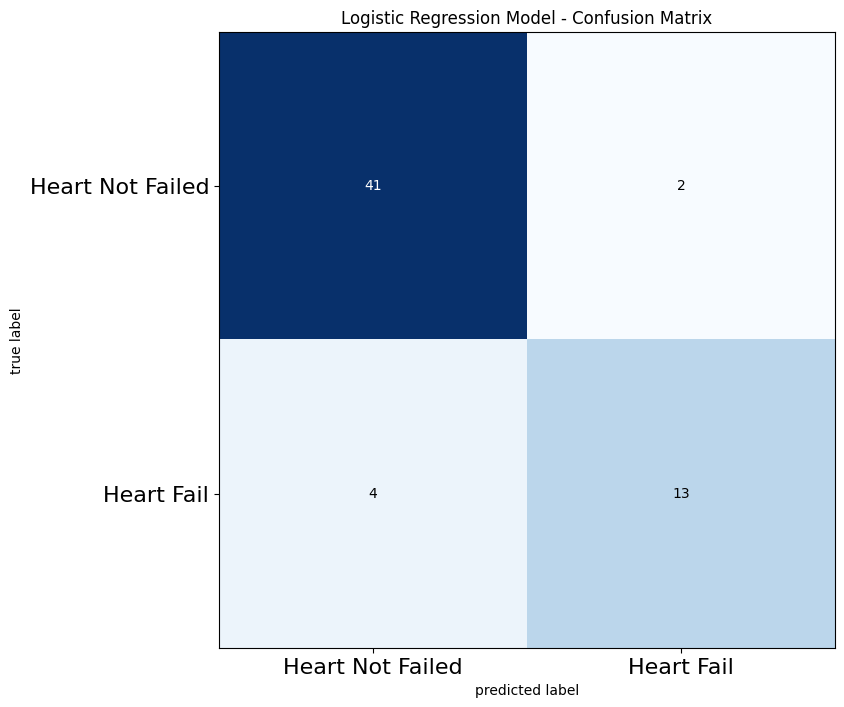

In [ ]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()


## ✔️ Метрики оценки модели

# Метрики логистической регрессии

## 1. Accuracy (Точность)
Доля правильно классифицированных примеров:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

## 2. Precision (Точность
)
Доля правильно предсказанных положительных классов:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

## 3. Recall (Полнота, чувствительность)
Доля реальных положительных примеров, которые модель правильно классифицировала:
$$
\text{Recall} = \frac{TP}{TP + FN}
$$



In [ ]:
accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred)
recall = recall_score(y_test, log_reg_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")


Accuracy: 0.900
Precision: 0.867
Recall: 0.765


## ROC-кривая (Receiver Operating Characteristic Curve)

    Эта кривая позволяет визуализировать качество классификации модели, показывая отношение чувствительности (True Positive Rate) к специфичности (False Positive Rate) на разных порогах.
    Вы можете использовать площадь под ROC-кривой (AUC-ROC), чтобы оценить, насколько хорошо ваша модель отличает положительные и отрицательные классы.



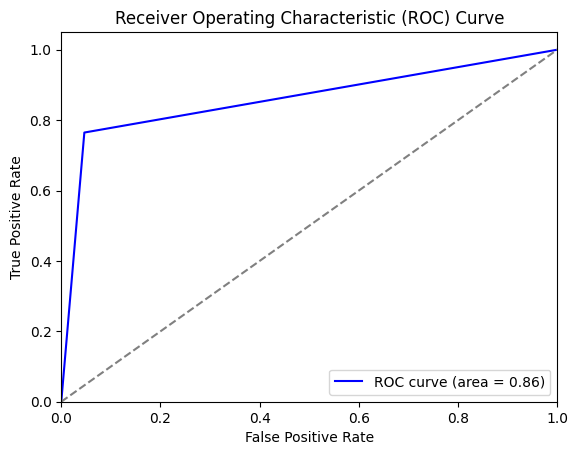

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test,  log_reg_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
